In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the datasets

In [199]:
customers =  pd.read_csv("Customers.csv")
products =  pd.read_csv("Products.csv")
transaction =  pd.read_csv("Transactions.csv")

In [200]:
# Convert date columns to datetime format
transaction['TransactionDate'] = pd.to_datetime(transaction['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

## Shape of dataset

In [201]:
data = {'Table': ['customers', 'products', 'transaction'],
        'Shape': [customers.shape, products.shape, transaction.shape]}

df_shapes = pd.DataFrame(data)
display(df_shapes)

,Table,Shape
0,customers,"(200, 4)"
1,products,"(100, 4)"
2,transaction,"(1000, 7)"


## Checking the detail of dataset

In [202]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [203]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [204]:
transaction.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


# Step 1: Check for missing values

In [205]:
print("Missing Values:\n")
print("Transactions:\n\n", transaction.isnull().sum())
print("Products:\n\n", products.isnull().sum())
print("Customers:\n\n", customers.isnull().sum())

Missing Values:

Transactions:

 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
Products:

 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Customers:

 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


# Step 2: Check for duplicates

In [206]:
print("\nDuplicates:\n")
print("Transactions:", transaction.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Customers:", customers.duplicated().sum())


Duplicates:

Transactions: 0
Products: 0
Customers: 0


# Step 3: Transaction Analysis

## Step3.1 Customer trend analysis

In [207]:
# Top 10 customers by transaction volume with name, region and signupDate
top_transaction=transaction.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).reset_index().merge(customers, on='CustomerID')
top_transaction.head(10)

,CustomerID,TotalValue,CustomerName,Region,SignupDate
0,C0141,10673.87,Paul Parsons,Europe,2023-02-23
1,C0054,8040.39,Bruce Rhodes,Asia,2024-09-29
2,C0065,7663.70,Gerald Hines,North America,2024-07-10
3,C0156,7634.45,William Adams,North America,2023-08-19
4,C0082,7572.91,Aimee Taylor,South America,2022-05-13
5,C0188,7111.32,Anna Ball,South America,2022-05-17
6,C0059,7073.28,Mrs. Kimberly Wright,North America,2024-04-07
7,C0028,6819.57,Jennifer Pena,Asia,2024-06-29
8,C0099,6715.72,Rodney Eaton,South America,2023-01-29
9,C0165,6708.10,Juan Mcdaniel,South America,2022-04-09


# Customer distribution based on region

In [208]:
# customer segmentation based on region  make the graph

import plotly.express as px

fig = px.bar(customers.groupby('Region')['CustomerID'].count().reset_index(),
             x='Region', y='CustomerID',
             labels={'Region': 'Region', 'CustomerID': 'Number of Customers'},
             title='Number of Customers per Region')
fig.show()


## SignUp trend over time

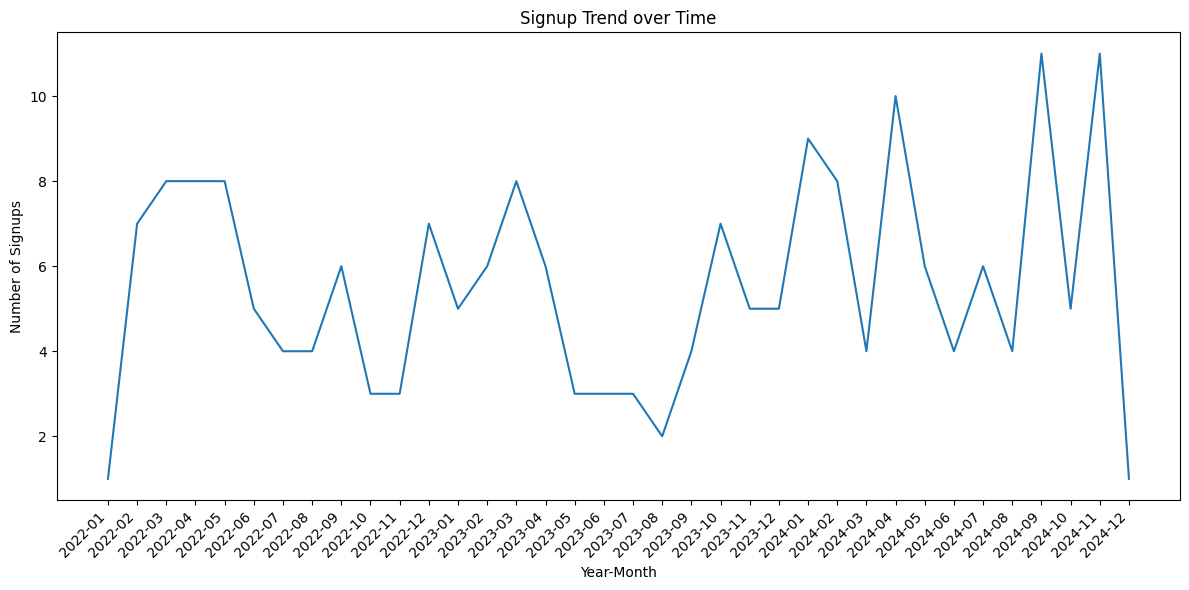

In [209]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Group by year and month to count signups

signup_trends = customers.groupby([customers['SignupDate'].dt.year.rename('Year'), customers['SignupDate'].dt.month.rename('Month')])['CustomerID'].count().reset_index()
signup_trends.rename(columns={'CustomerID': 'CustomerID'}, inplace=True)

# Create a 'Year-Month' column for better visualization
signup_trends['Year-Month'] = signup_trends['Year'].astype(str) + '-' + signup_trends['Month'].astype(str).str.zfill(2)

# Plotting the signup trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year-Month', y='CustomerID', data=signup_trends)  # Use 'CustomerID' for y-axis
plt.title('Signup Trend over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [219]:
customers['SignupMonth'] = customers['SignupDate'].dt.month
customers['SignupYear'] = customers['SignupDate'].dt.year


### SignUp trend over Year

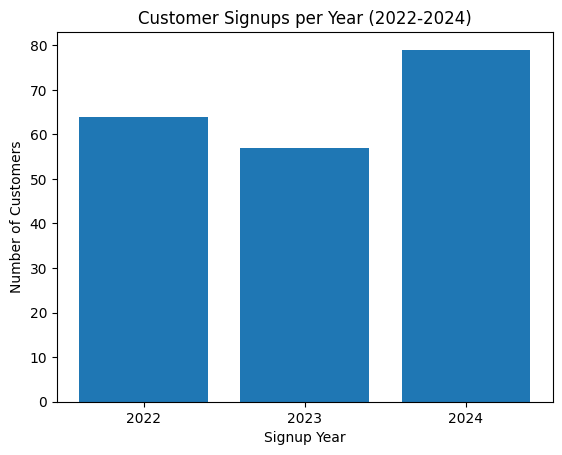

In [212]:
signup_counts = customers.groupby('SignupYear')['CustomerID'].count()

# Filter signup_counts for the desired years
years_to_plot = [2022, 2023, 2024]
filtered_counts = signup_counts[signup_counts.index.isin(years_to_plot)]

# Create the bar plot
plt.bar(filtered_counts.index, filtered_counts.values)
plt.xlabel("Signup Year")
plt.ylabel("Number of Customers")
plt.title("Customer Signups per Year (2022-2024)")
plt.xticks(years_to_plot)  # Set x-axis ticks to the desired years
plt.show()

#Step 3.2 Product analysis
###Top 10 product which is purchased by customer

In [242]:
product_sales=transaction.groupby("ProductID")[['Quantity','TotalValue']].sum().reset_index()

product_sales=product_sales.merge(products,on="ProductID",how='right')

product_sales.sort_values(by=['Quantity','TotalValue'],ascending=False).head(10)

,ProductID,Quantity,TotalValue,ProductName,Category,Price
58,P059,46,13947.20,SoundWave Jeans,Clothing,303.20
53,P054,46,2635.80,SoundWave Cookbook,Books,57.30
28,P029,45,19513.80,TechPro Headphones,Electronics,433.64
78,P079,43,17946.91,ActiveWear Rug,Home Decor,417.37
47,P048,43,17905.20,TechPro Cookbook,Books,416.40
56,P057,43,10307.10,ActiveWear Smartphone,Electronics,239.70
60,P061,43,6749.28,HomeSense Desk Lamp,Home Decor,156.96
61,P062,39,14592.24,HomeSense Novel,Books,374.16
19,P020,38,15060.92,ActiveWear Jacket,Clothing,396.34
27,P028,38,8952.04,HomeSense Desk Lamp,Home Decor,235.58


#### Categories which sells the most product

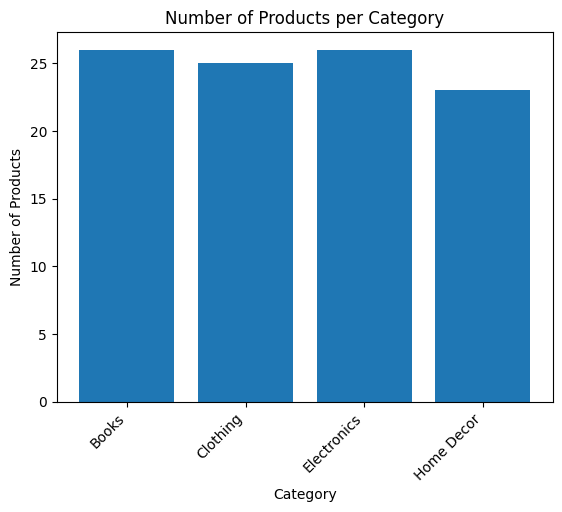

In [243]:

category_counts = products.groupby("Category")['ProductID'].count()
fig = plt.bar(category_counts.index, category_counts.values)

plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.title("Number of Products per Category")
plt.xticks(rotation=45, ha='right')

plt.show()

### Categories generating total revenue

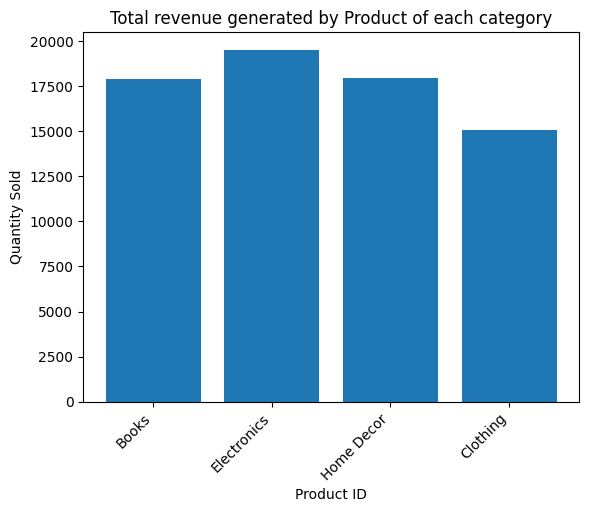

In [244]:
fig = plt.bar(product_sales['Category'], product_sales['TotalValue'])

plt.xlabel("Product ID")
plt.ylabel("Quantity Sold")
plt.title("Total revenue generated by Product of each category")
plt.xticks(rotation=45, ha='right')

plt.show()

# Step3.3 Transaction analysis
### Revenue trends over time

Month
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


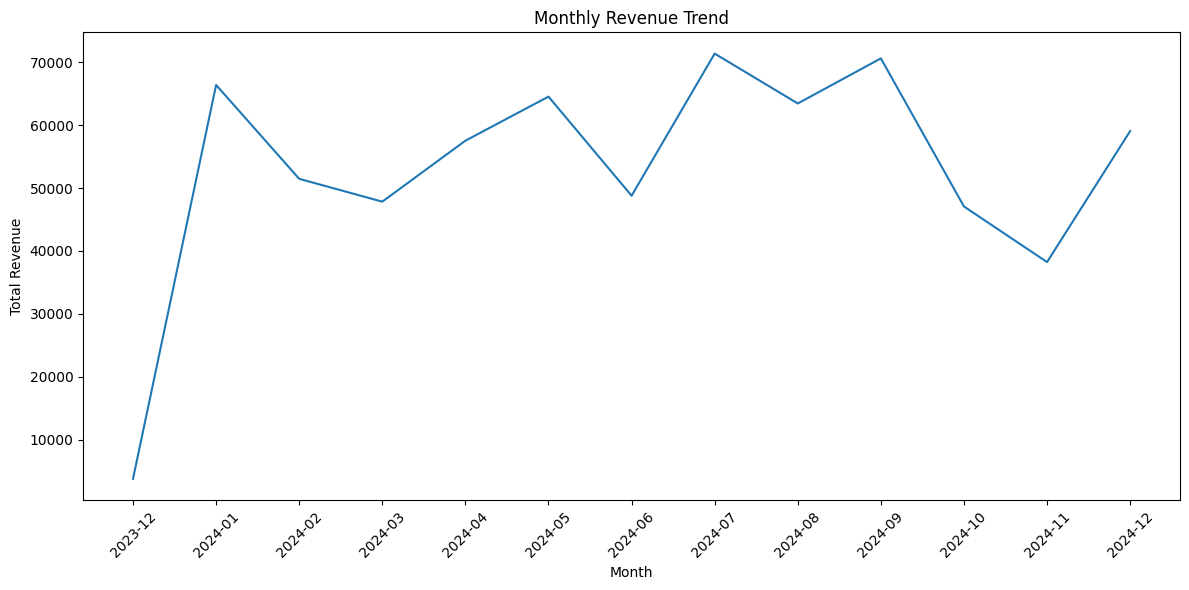

In [245]:
transaction['Month'] = transaction['TransactionDate'].dt.to_period('M')
monthly_revenue = transaction.groupby('Month')['TotalValue'].sum()

# monthly_revenue.index = monthly_revenue.index.astype(str).str.replace('-', ' ')
# month_names = monthly_revenue.index.map(lambda x: pd.to_datetime(x).strftime('%B'))
# monthly_revenue.index = month_names
print(monthly_revenue)
# Plotting monthly revenue
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index.astype(str), monthly_revenue.values)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Product  


Revenue by Category:
 Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


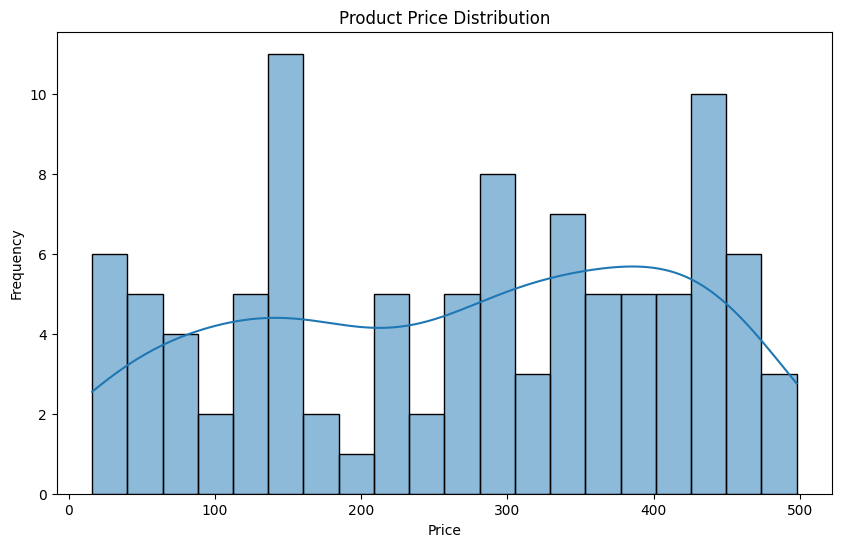

In [217]:
merged_df = pd.merge(transaction, products, on='ProductID', how='left')

# Revenue by category
category_revenue = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue by Category:\n", category_revenue)

# Product price distribution
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], bins=20, kde=True)
plt.title("Product Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


###Seasonality Analyze transactions by day

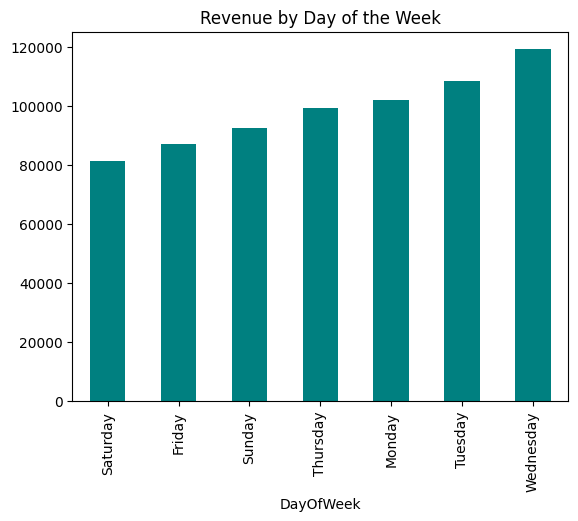

In [246]:
transaction['DayOfWeek'] = transaction['TransactionDate'].dt.day_name()
daily_trends = transaction.groupby('DayOfWeek')['TotalValue'].sum().sort_values()
daily_trends.plot(kind='bar', color='teal', title='Revenue by Day of the Week')
plt.show()


###Repeat Customers

In [223]:

repeat_customers = transaction['CustomerID'].value_counts()
repeat_customers = repeat_customers[repeat_customers > 1]
print("Number of Repeat Customers:", len(repeat_customers))


Number of Repeat Customers: 187


<!-- Customer Recency, Frequency, and Monetary Analysis (RFM):

Group customers by their transaction behavior:
Recency: Days since the last purchase.
Frequency: Total number of purchases.
Monetary: Total revenue contributed. -->


#Revenue contribution by region.





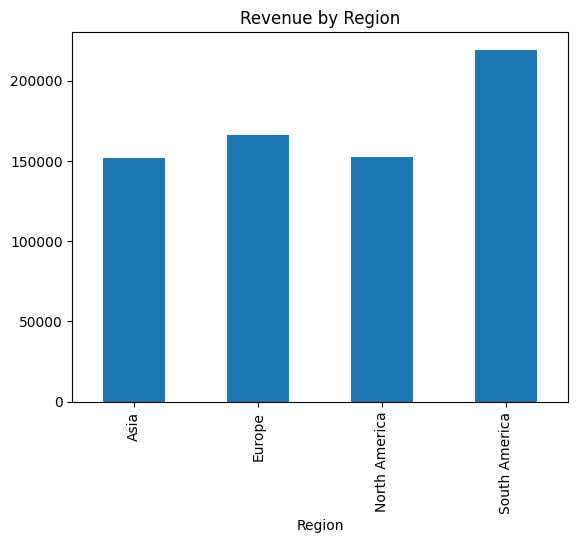

In [231]:
merged_with_customers = pd.merge(merged_df, customer, on='CustomerID', how='left')
region_revenue = merged_with_customers.groupby('Region')['TotalValue'].sum()
region_revenue.plot(kind='bar', title='Revenue by Region')
plt.show()


# Signup Growth by Region:

Analyzing customer acquisition trends across regions.

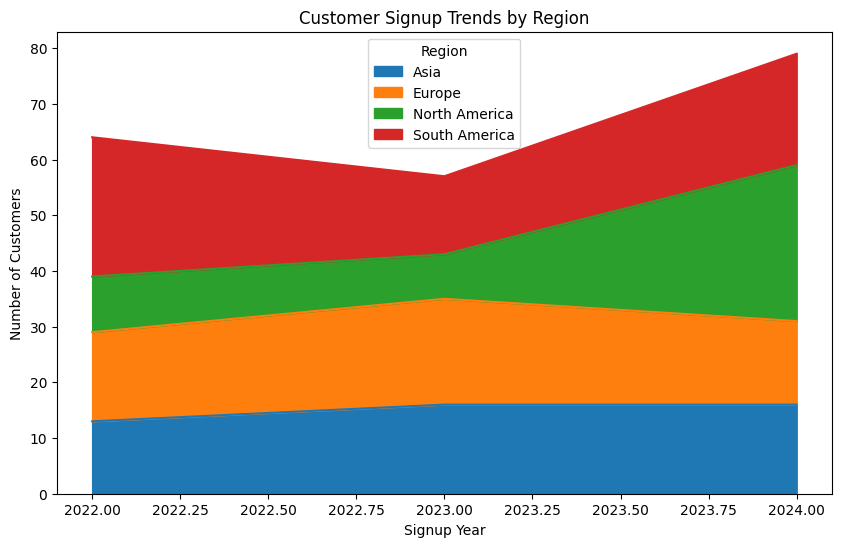

In [240]:
# Add a column for the year of signup
customers['SignupYear'] = customers['SignupDate'].dt.year

filtered_signup_region = customers[customers['SignupYear'].isin([2022, 2023, 2024])]

# Group by year and region, then unstack to create an area chart
signup_region = filtered_signup_region.groupby('SignupYear')['Region'].value_counts().unstack()
signup_region.plot(kind='area', stacked=True, title='Customer Signup Trends by Region', figsize=(10, 6))
plt.xlabel('Signup Year')
plt.ylabel('Number of Customers')
plt.show()


# 5.Customer-Category Spending Matrix:

Analyze how different customer segments contribute to each product category.
python
Copy
Edit


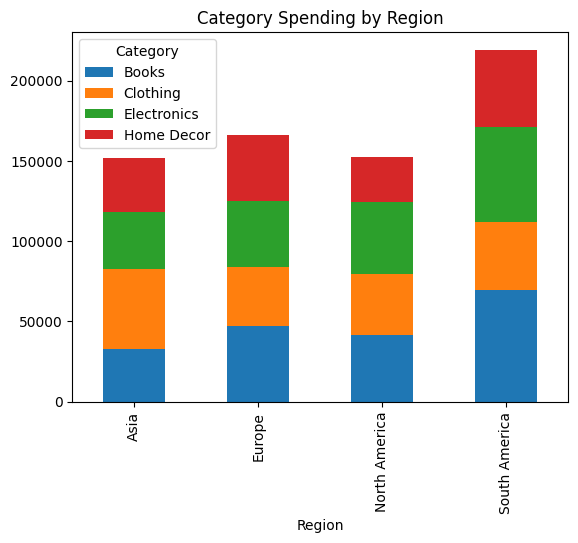

In [238]:
category_customer_spending = merged_with_customers.pivot_table(
    index='Region', columns='Category', values='TotalValue', aggfunc='sum')
category_customer_spending.plot(kind='bar', stacked=True)
plt.title('Category Spending by Region')
plt.show()
